<a href="https://colab.research.google.com/github/gabrielvrl/Machine-Learning-ECT/blob/master/SOM_U2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
dataSet =  pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/lop_submissao_semana.csv",index_col=False )

dataSet['situacao'] = pd.Categorical(dataSet['situacao'])
dataSet['situacao'] = dataSet['situacao'].cat.codes

dataSet.head()


,Unnamed: 0,anoSubmissao,semana 1,semana 2,semana 3,semana 4,semana 5,semana 6,semana 7,semana 8,semana 9,semana 10,semana 11,semana 12,semana 13,semana 14,semana 15,semana 16,semana 17,semana 18,semana 19,semana 20,semana 21,anoTurma,descricaoTurma,situacao,anoSigaa,turma
0,0,2017.2,0.0,0.0,0.0,5.0,14.0,5.0,0.0,15.0,10.0,0.0,0.0,16.0,3.0,0.0,0.0,20.0,0.0,9.0,0.0,0.0,0.0,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01A,0,2017.2,01A
1,1,2017.2,0.0,0.0,0.0,5.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,1,2017.2,01B
2,2,2017.2,0.0,0.0,0.0,5.0,0.0,5.0,0.0,14.0,2.0,0.0,0.0,4.0,0.0,5.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,0,2017.2,01B
3,3,2017.2,0.0,0.0,0.0,3.0,0.0,6.0,0.0,8.0,3.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,0,2017.2,01B
4,4,2017.2,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2017.2,LÓGICA DE PROGRAMAÇÃO - Turma 01B,1,2017.2,01B


In [0]:
# Instalando a MiniSOM
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.1-cp36-none-any.whl size=6643 sha256=e6b842edbd7c1a39df4eeb27b1015fa1a0c0086fc560f45db6ed71b5b8ec2617
  Stored in directory: /root/.cache/pip/wheels/41/42/7d/dd12b479c5ea50cd572d91b8e935e4f11e1302acca329f84e0
Successfully built minisom


In [0]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 28 columns):
Unnamed: 0        948 non-null int64
anoSubmissao      948 non-null float64
semana 1          948 non-null float64
semana 2          948 non-null float64
semana 3          948 non-null float64
semana 4          948 non-null float64
semana 5          948 non-null float64
semana 6          948 non-null float64
semana 7          948 non-null float64
semana 8          948 non-null float64
semana 9          948 non-null float64
semana 10         948 non-null float64
semana 11         948 non-null float64
semana 12         948 non-null float64
semana 13         948 non-null float64
semana 14         948 non-null float64
semana 15         948 non-null float64
semana 16         948 non-null float64
semana 17         948 non-null float64
semana 18         948 non-null float64
semana 19         948 non-null float64
semana 20         948 non-null float64
semana 21         948 non-null float64


In [0]:

X_train = dataSet.iloc[:,2:23].values 
target_train = dataSet.iloc[:,25].values

[row, col] = X_train.shape
print (row," ",col)

print(X_train[1,:])

948   21
[0. 0. 0. 5. 0. 6. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]


In [0]:
# Training the SOM
tamanhoXdaRede = 7; 
tamanhoYdaRede = 7; 

quantidadeCaracteristicas = col
from minisom import MiniSom
som = MiniSom(x = tamanhoXdaRede, y = tamanhoYdaRede, input_len = quantidadeCaracteristicas, sigma = 1.0, learning_rate = 0.4)
som.pca_weights_init(X_train)


In [0]:
som.train_random(data = X_train, num_iteration = 40000)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
# Obtem o vetor de pesos da rede treinada 
pesos = som.get_weights()

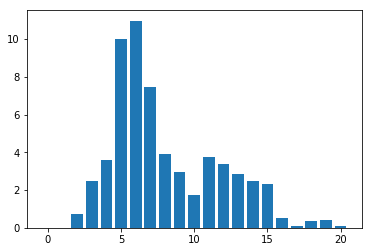

In [0]:
# Mostra um peso 
x = np.arange(quantidadeCaracteristicas)
plt.bar(x, pesos[1,2,:])
plt.show()

In [0]:
# obtendo os valores das repostas 
Y_train = target_train
Y_train[1]

1

In [0]:
# encontra o vencedor 
x = X_train[1,:]
pos = som.winner(x)


# matriz de zeros para contador de aprovados 
MContAp = np.zeros((tamanhoXdaRede,tamanhoYdaRede))
# matriz de zeros para o contador de reprovados 
MContT = np.zeros((tamanhoXdaRede,tamanhoYdaRede))
cont = 0; 
for x in X_train: 
  pos = som.winner(x)
  if (Y_train[cont] <= 1): #Aprovado 
    MContAp[pos] += 1
  MContT[pos] += 1
  cont= cont+1

In [0]:
print("Total:")
print(MContT)


print("Aprovados")
print(MContAp)

Total:
[[ 12.   7.  10.  16.  22.   8.   7.]
 [ 20.  13.   7.  14.   6.  16.  11.]
 [ 26.  14.  12.  10.  19.  10.  14.]
 [ 20.  17.  20.  17.  24.  15.   6.]
 [ 37.  10.  22.   7.  21.  10.  11.]
 [ 32. 172.   9.  26.  15.  17.  15.]
 [ 17.  48.  33.  14.  17.  15.   7.]]
Aprovados
[[12.  7.  8. 16. 21.  8.  7.]
 [19. 12.  6. 11.  6. 15. 11.]
 [23. 12. 11. 10. 16.  9. 13.]
 [12. 11.  9. 13. 12. 10.  6.]
 [26.  7. 10.  5. 19. 10. 11.]
 [14. 42.  7. 24.  8. 13. 14.]
 [11. 34. 17. 13. 12. 11.  5.]]


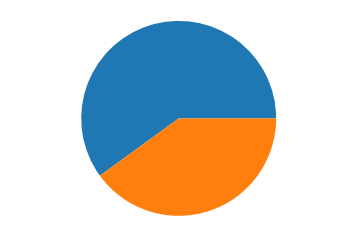

In [0]:
#import matplotlib.pyplot as plt

x = 3
y = 2
sizes = [x, y]
explode = (0, 0.02, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

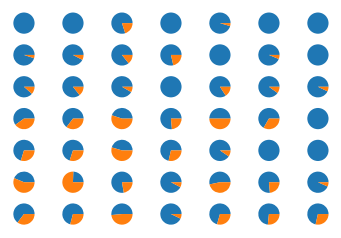

In [0]:

cont = 1;
for i in range(len(MContT)):
  for j in range(len(MContT)):
    plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
    cont=cont+1
    sizes = [MContAp[i][j],MContT[i][j]-MContAp[i][j]]
    plt.pie(sizes)
plt.show()

In [0]:

MContT[1][0]

20.0

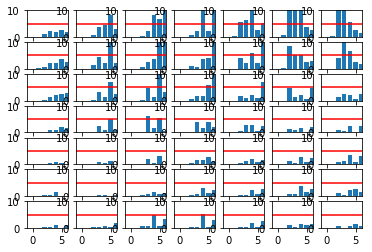

In [0]:
# Mostra todos os pesos 
cont = 1;
x = np.arange(quantidadeCaracteristicas)
for row in pesos:
  for elem in row:
    plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
    cont=cont+1
    plt.axis([-1, 6, 0, 10])
    plt.bar(x, elem)
    plt.plot([-1,6],[5,5],'r')
plt.show()
#plt.savefig("test_som.jpg", dpi=150)

In [0]:
c = np.divide(MContAp,MContT)
# Substitui nan por 0 
res = c
where_are_NaNs = np.isnan(res)

res[where_are_NaNs] = 0
print(res)

[[1.         1.         0.8        1.         0.95454545 1.
  1.        ]
 [0.95       0.92307692 0.85714286 0.78571429 1.         0.9375
  1.        ]
 [0.88461538 0.85714286 0.91666667 1.         0.84210526 0.9
  0.92857143]
 [0.6        0.64705882 0.45       0.76470588 0.5        0.66666667
  1.        ]
 [0.7027027  0.7        0.45454545 0.71428571 0.9047619  1.
  1.        ]
 [0.4375     0.24418605 0.77777778 0.92307692 0.53333333 0.76470588
  0.93333333]
 [0.64705882 0.70833333 0.51515152 0.92857143 0.70588235 0.73333333
  0.71428571]]


In [0]:
def mostraNeuronio(linha,coluna): 
  # Mostra um peso 
  x = np.arange(quantidadeCaracteristicas)
  plt.plot([-1,20],[5,5],'r')
  plt.bar(x, pesos[linha,coluna,:])
  plt.show()

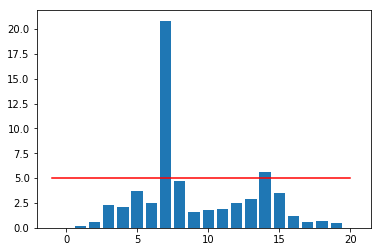

In [0]:
# Probabilidade zero de passar em LoP
mostraNeuronio(1,0)
# Se ele reprova em todas ele não terá chances de passa em LoP

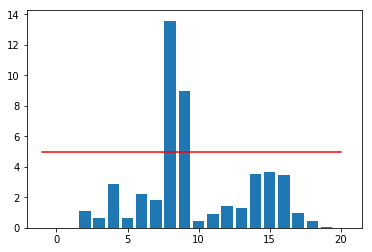

In [0]:
# Perfil com total probabilidade de passar em LoP
mostraNeuronio(4,5)


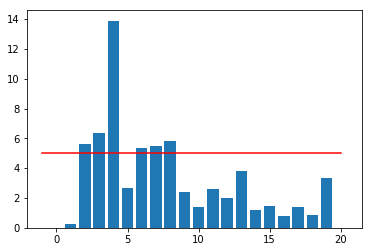

In [0]:
# Probabilidade muito baixa de passar em LoP
mostraNeuronio(0,4)

## Algumas observações 

*  Quando o aluno reprova com uma nota muito baixa em VGA ou Cálculo, as chances de passar em LoP reduzem muito.
*  Ser reprovado em duas disciplinas também reduz muito as chances de passar em LoP. 
* As disciplinas de PLE e CTS parecem não influenciam tanto. Geralmente os alunos têm bons desempenhosnestes componentes.